<a href="https://colab.research.google.com/github/1rd0/18lab_bek/blob/master/l2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers
!pip install accelerate
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [1]:
import torch
from PIL import Image
import requests
from matplotlib import pyplot as plt
from transformers import (
BlipForConditionalGeneration,
BlipProcessor,
)

In [2]:
IMAGE_URL = "https://img.freepik.com/premium-photo/colored-pencils-are-onthe-table_197602-600.jpg"
EDIT_PROMPT = "change pencils to nails"
SEED_VALUE = 41

In [3]:
# Set the device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
GENERATOR = torch.Generator().manual_seed(SEED_VALUE)

In [6]:
class Config:
  IMAGE_SIZE = (512, 512)
  LANGUAGE_MODEL_ID = "Qwen/Qwen1.5-0.5B-Chat"
  CAPTION_MODEL_ID = "Salesforce/blip-image-captioning-base"
  DETECTION_MODEL_ID = "google/owlv2-base-patch16-ensemble"
  SEGMENTATION_MODEL_ID = "facebook/sam-vit-base"
  INPAINTING_MODEL_ID = "diffusers/stable-diffusion-xl-1.0-inpainting0.1"
config = Config()

In [8]:
def delete_model(model: torch.nn.Module):
  model.to("cpu")
  del model
  torch.cuda.empty_cache()

In [9]:
def load_image(image_url, image_size = (512, 512)):
  raw_image = Image.open(requests.get(image_url,
  stream=True).raw).convert("RGB")
  image = raw_image.resize(image_size)
  return image

In [10]:


image = load_image(image_url=IMAGE_URL,
image_size=config.IMAGE_SIZE)

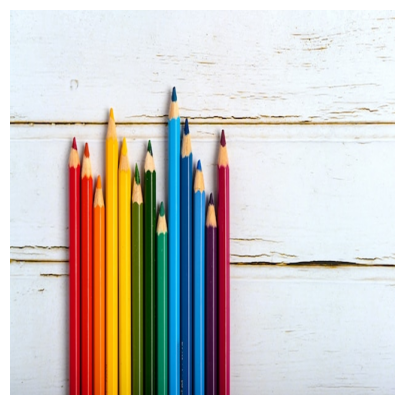

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis("off")
plt.show()

In [14]:
def run_caption_model(model_id: str, image: Image, device: str = "cuda"):
  caption_model =BlipForConditionalGeneration.from_pretrained(model_id).to(device)
  caption_processor = BlipProcessor.from_pretrained(model_id)
  inputs = caption_processor(image, return_tensors="pt").to(device)
  with torch.no_grad():
    outputs = caption_model.generate(**inputs, max_new_tokens=50)
  caption = caption_processor.decode(outputs[0],
  skip_special_tokens=True)
  delete_model(caption_model)
  return caption

In [15]:
caption = run_caption_model(
model_id=config.CAPTION_MODEL_ID, image=image, device=DEVICE
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [16]:
print("#"*100)
print(f"Using caption model: {config.CAPTION_MODEL_ID}")
print(f"Caption: {caption}")
print("#"*100)

####################################################################################################
Using caption model: Salesforce/blip-image-captioning-base
Caption: colored pencils on white wooden background
####################################################################################################
